In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D


In [14]:

n_qubits = 4

# file_name_template = f'{n_qubits}_qubits_{t_model}_tmodel_{p_basis}_pbasis.pickle'

options = [(tt,pp) for tt in [1,10,100] for pp in [8,16,32]]

# results = {}

data = []

for (t_model, p_basis) in options:

    filename = f'{n_qubits}_qubits_{t_model}_tmodel_{p_basis}_pbasis.pickle'
    print(filename)

    file = open('RESULTS/'+filename, 'rb')

    # results[f'{n_qubits}_{t_model}_{p_basis}'] = pickle.load(file)

    minimum_loss = pickle.load(file)['minimum_loss'] 

    data.append([t_model, p_basis, float(minimum_loss)])

    print([t_model, p_basis, float(minimum_loss)])


data = np.array(data)

4_qubits_1_tmodel_8_pbasis.pickle
[1, 8, 14.539736771569121]
4_qubits_1_tmodel_16_pbasis.pickle
[1, 16, 14.543456572178867]
4_qubits_1_tmodel_32_pbasis.pickle
[1, 32, 14.57483180443338]
4_qubits_10_tmodel_8_pbasis.pickle
[10, 8, 9.760991628734816]
4_qubits_10_tmodel_16_pbasis.pickle
[10, 16, 9.04942857657485]
4_qubits_10_tmodel_32_pbasis.pickle
[10, 32, 18.978688092666715]
4_qubits_100_tmodel_8_pbasis.pickle
[100, 8, 10.464270681655165]
4_qubits_100_tmodel_16_pbasis.pickle
[100, 16, 14.439467423032326]
4_qubits_100_tmodel_32_pbasis.pickle
[100, 32, 12.208440206242422]


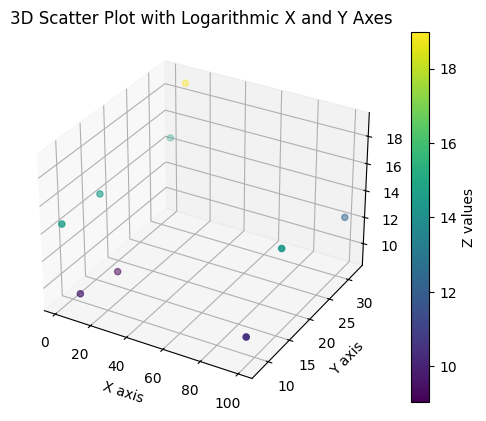

In [22]:
# Extracting columns
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# # Set logarithmic scale for X and Y axes
# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot with Logarithmic X and Y Axes')

# Add color bar which maps values to colors
cbar = plt.colorbar(sc, ax=ax, label='Z values')

plt.show()

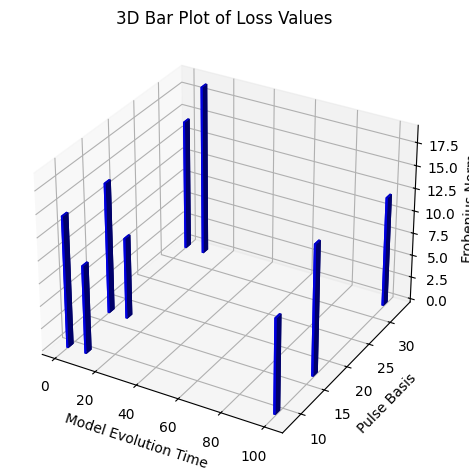

In [33]:
# Extracting columns
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create 3D bar plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creating the bar positions and dimensions
xpos = x
ypos = y
zpos = np.zeros_like(z)

dx = np.ones_like(z)  # Width of the bars
dy = np.ones_like(z)  # Depth of the bars
dz = z  # Height of the bars

# Plot the bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Set labels and title
ax.set_xlabel('Model Evolution Time')
ax.set_ylabel('Pulse Basis')
ax.set_zlabel('Frobenius Norm')
ax.set_title('3D Bar Plot of Loss Values')
plt.tight_layout()
plt.savefig("barplot.pdf")
plt.show()

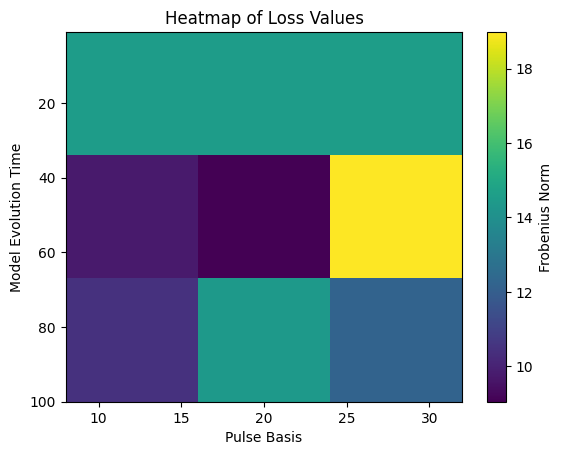

In [34]:
# Extracting unique x and y values
x_unique = np.unique(data[:, 0])
y_unique = np.unique(data[:, 1])

# Creating a 2D grid for z values
z_grid = np.zeros((x_unique.shape[0], y_unique.shape[0]))

# Filling the z_grid with z values from data
for i, x_val in enumerate(x_unique):
    for j, y_val in enumerate(y_unique):
        z_val = data[(data[:, 0] == x_val) & (data[:, 1] == y_val), 2]
        z_grid[i, j] = z_val

# Create heatmap


plt.imshow(z_grid, extent=(y_unique.min(), y_unique.max(), x_unique.max(), x_unique.min()), aspect='auto', cmap='viridis')
plt.colorbar(label='Frobenius Norm')


plt.xlabel('Pulse Basis')
plt.ylabel('Model Evolution Time')
plt.title('Heatmap of Loss Values')

plt.savefig("heatmap.pdf")

plt.show()